# Library

In [2]:
import numpy as np, os
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#한글설정
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [3]:
# guri 
g_all_df = pd.read_csv('/project/guri/Restart/reverse_FI.csv')
g_df_d1d5 = pd.read_csv('/project/guri/Restart/reverse_FI_d1d5.csv')
g_df_d6d10= pd.read_csv('/project/guri/Restart/reverse_FI_d6d10.csv')

In [3]:
# LSH
all_df = pd.read_csv('df_all_best.csv')
df_d1d5 = pd.read_csv('df_d1d5_best.csv')
df_d6d10 = pd.read_csv('df_d6d10_best.csv')

# All reversed

In [10]:
# LSH
all_df = all_df.sort_values(by='diff',ascending=False)
all_df['feature'][:10].values

array([  409606211,    74606211,    67434504,    54817525, 10019055302,
            227194,    54858516,    74706811,    45006701,     4003822])

In [14]:
# guri
base_value = g_all_df[g_all_df['feature']=='BASELINE']['bce'].values[0]
g_all_df['base'] = base_value
g_all_df['diff'] = g_all_df['bce']-g_all_df['base']
g_all_df['feature'][:10].values

array(['409606211', '51479005520', '67434504', '74606211', '59011010325',
       '54858516', '50927', '409115170', '83000730', '2411260'],
      dtype=object)

# 1 ~ 5 reversed

In [9]:
# LSH
df_d1d5 = df_d1d5.sort_values(by='diff',ascending=False)
df_d1d5['feature'][:10].values

array([  409606211,    74606211,    67434504,    54817525, 10019055302,
          54858516,    74706811,    45006701,      228125, 63323016501])

In [44]:
# guri
base_value = g_df_d1d5[g_df_d1d5['feature']=='BASELINE']['bce'].values[0]
g_df_d1d5['base'] = base_value
g_df_d1d5['diff'] = g_df_d1d5['bce']-g_df_d1d5['base']

g_df_d1d5['feature'][:10].values

array(['409606211', '51479005520', '74606211', '67434504', '59011010325',
       '54858516', '50927', '409115170', '83000730', '2411260'],
      dtype=object)

# 6 ~ 10 reversed

In [8]:
# LSH
df_d6d10 = df_d6d10.sort_values(by='diff',ascending=False)
df_d6d10['feature'][:10].values

array([     227194,       50889,       51200,   182138167,   517293025,
           4003822,       51362, 63323038810,       51143,   904585461])

In [41]:
# guri
base_value = g_df_d6d10[g_df_d6d10['feature']=='BASELINE']['bce'].values[0]
g_df_d6d10['base'] = base_value
g_df_d6d10['diff'] = g_df_d6d10['bce']-g_df_d6d10['base']

g_df_d6d10['feature'][:10].values

array(['51479005520', '409606211', '10019021302', '51148', '83000730',
       '59011010325', '49669521303', '121048910', '173024256', '54001920'],
      dtype=object)

# All - Top10 그래프
- - 7727명 中 생존 : 4718명 / 생존 : 3009명

In [44]:
x = np.load('x_(7727,10,4068).npy')
total_data = pd.read_csv('total_data_7727.csv')

In [45]:
all_df = all_df.sort_values(by='diff',ascending=False)
all_feature = all_df['feature'].tolist()

# LAB, PRE, PRO의 item_list 생성 
LAB_item = total_data[total_data['TYPE']=='LAB']['ITEMID'].unique()
PRE_item = total_data[total_data['TYPE']=='PRE']['ITEMID'].unique()
PRO_item = total_data[total_data['TYPE']=='PRO']['ITEMID'].unique()

LAB_list = []
PRE_list = []
PRO_list = []
for i in all_feature:
    if i in LAB_item:
        LAB_list.append(i)
    elif i in PRE_item:
        PRE_list.append(i)
    else:
        PRO_list.append(i)

## PRE - top10
- `not saved model`
- 409606211, 74606211, 67434504, 54817525, 10019055302, 54858516, 74706811, 45006701, 63323016501, 58177025504 
- `saved model`
- 409606211, 74606211, 67434504, 54817525, 10019055302, 54858516, 74706811, 45006701, 4003822,63323016501

In [19]:
# 1) PRE_top10의 index 구하기
PRE_top10 = PRE_list[:10]
item_list = total_data['ITEMID'].unique()

PRE_index = []
for i in PRE_top10:
    a = list(item_list).index(i)
    PRE_index.append(a)
PRE_index

[835, 178, 522, 2298, 1190, 716, 1495, 410, 971, 362]

In [19]:
# 2-1) 생존자 index 구하는 법 1
y = np.load('y_(7727,1).npy')

n = -1

생존자_index1 = []
while True:
    if list(y)[n+1:].count(1) == 0:
        break
    n += list(y)[n+1:].index(1) + 1
    생존자_index1.append(n)

In [20]:
# 2-2) 생존자 index 구하는 법 2
total_data = pd.read_csv('total_data_7727.csv')
sub7727 = total_data['SUBJECT_ID'].unique()

patient = pd.read_csv('폐렴환자.csv')
patient = patient.sort_values(by='SUBJECT_ID')
patient = patient[patient['SUBJECT_ID'].isin(sub7727)]
sub_1_list = patient[patient['EXPIRE_FLAG']==1]['SUBJECT_ID'].values

생존자_index2 = []
for i in sub_1_list:
    a = list(sub7727).index(i)
    생존자_index2.append(a)

In [21]:
# 3) 생존자 4718명의 D-10 ~ D-1 feature별 abnormal sum 

x_생존자 = x[생존자_index1,:,:]

result = []
for i in PRE_index:
    for j in range(10):
        result.append(x_생존자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRE = pd.DataFrame(result)
df_PRE.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRE.index = PRE_top10

# 생존한 4718명에 대한 비율 계산
for i in PRE_top10:
    df_PRE.loc[f'{i}_생존'] = df_PRE.loc[i].iloc[:-1]/4718 

# df_PRE

In [22]:
# 4) 사망자 3009명의 D-10 ~ D-1 feature별 abnormal sum 

사망자_index = list(set(range(0,7727))-set(생존자_index1))

x_사망자 = x[사망자_index,:,:]

result = []
for i in PRE_index:
    for j in range(10):
        result.append(x_사망자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRE_사망자 = pd.DataFrame(result)
df_PRE_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRE_사망자.index = PRE_top10

# 사망한 3009명에 대한 비율 계산
for i in PRE_top10:
    df_PRE_사망자.loc[f'{i}_사망'] = df_PRE_사망자.loc[i]/3009 

# df_PRE_사망자

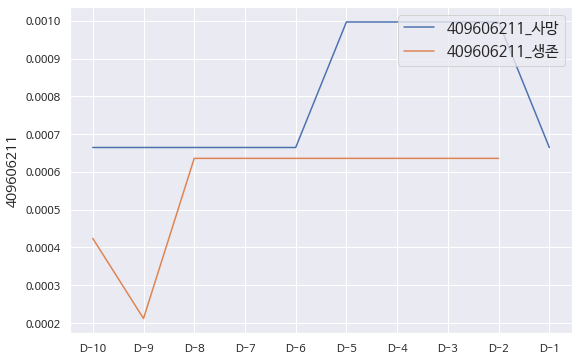

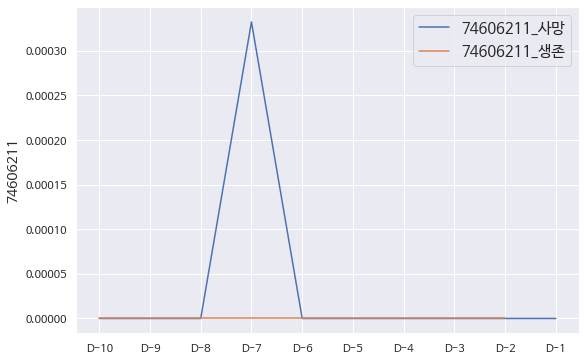

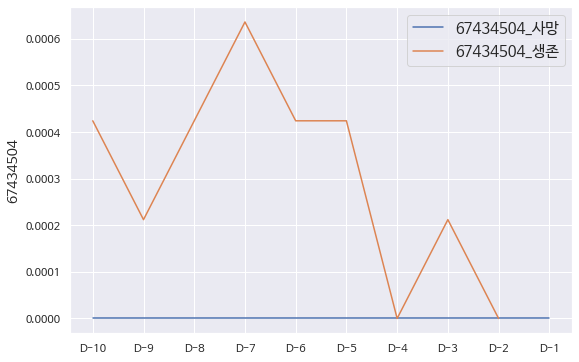

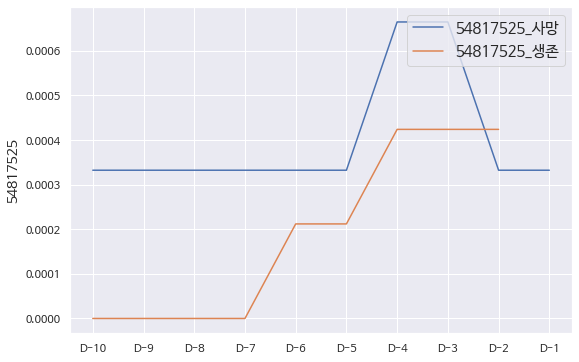

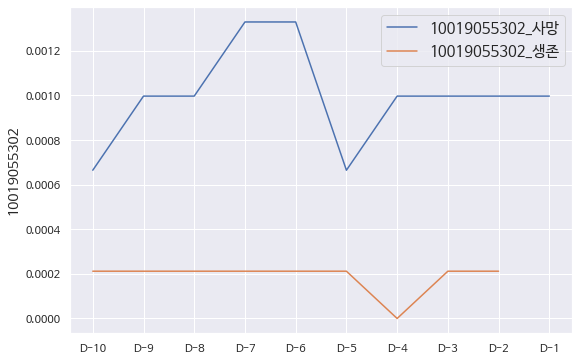

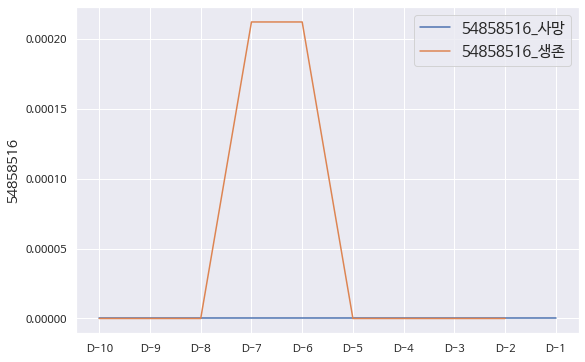

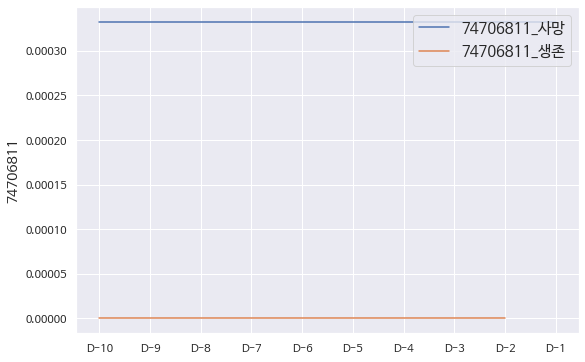

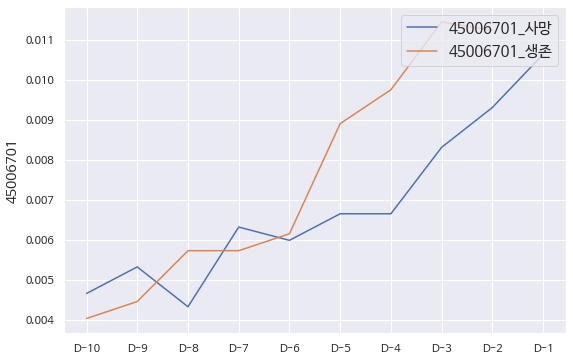

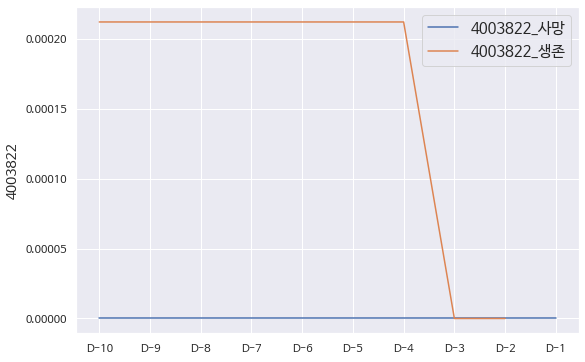

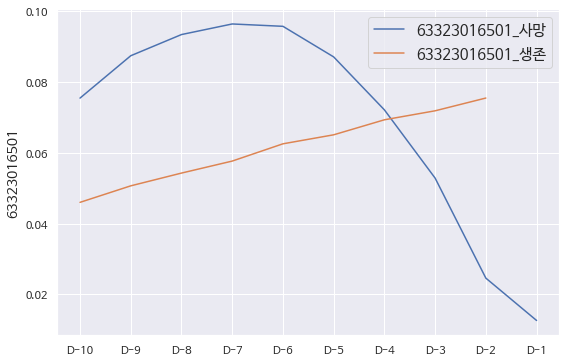

In [23]:
# 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

df_PRE_trans = df_PRE.transpose()
df_PRE_사망자_trans = df_PRE_사망자.transpose()

for i in PRE_top10:
    _ = plt.figure(figsize = (9,6))

    p = sns.lineplot(data = df_PRE_사망자_trans, x = df_PRE_사망자_trans.index, y = f'{i}_사망')
    p = sns.lineplot(data = df_PRE_trans, x = df_PRE_trans.index, y = f'{i}_생존')
    _ = p.legend(labels = [f'{i}_사망', f'{i}_생존'], loc = 'upper right', fontsize=15)
    _ = p.set_ylabel(i, fontsize = 14)

## PRO - top10
- `not saved`
- 228125, 224270, 227194, 225202, 228127, 228128, 226124, 225794, 225450, 228130
- `saved`
- 227194, 228125, 224270, 225202, 228127, 228128, 226124, 224277, 225450, 225816

In [22]:
# 1) PRO_top10의 index 구하기
PRO_top10 = PRO_list[:10]
item_list = total_data['ITEMID'].unique()

PRO_index = []
for i in PRO_top10:
    a = list(item_list).index(i)
    PRO_index.append(a)
PRO_index

[813, 1698, 667, 1656, 2984, 1728, 3766, 316, 3458, 1403]

In [27]:
# 2) 생존자 index 구하기
total_data = pd.read_csv('total_data_7727.csv')
sub7727 = total_data['SUBJECT_ID'].unique()

patient = pd.read_csv('폐렴환자.csv')
patient = patient.sort_values(by='SUBJECT_ID')
patient = patient[patient['SUBJECT_ID'].isin(sub7727)]
sub_1_list = patient[patient['EXPIRE_FLAG']==1]['SUBJECT_ID'].values

생존자_index = []
for i in sub_1_list:
    a = list(sub7727).index(i)
    생존자_index.append(a)

In [28]:
# 3) 생존자 4718명의 D-10 ~ D-1 feature별 abnormal sum 

x_생존자 = x[생존자_index,:,:]

result = []
for i in PRO_index:
    for j in range(10):
        result.append(x_생존자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRO = pd.DataFrame(result)
df_PRO.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRO.index = PRO_top10

# 생존한 4718명에 대한 비율 계산
for i in PRO_top10:
    df_PRO.loc[f'{i}_생존'] = df_PRO.loc[i].iloc[:-1]/4718 

# df_PRO

In [29]:
# 4) 사망자 3009명의 D-10 ~ D-1 feature별 abnormal sum 

사망자_index = list(set(range(0,7727))-set(생존자_index))

x_사망자 = x[사망자_index,:,:]

result = []
for i in PRO_index:
    for j in range(10):
        result.append(x_사망자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRO_사망자 = pd.DataFrame(result)
df_PRO_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRO_사망자.index = PRO_top10

# 사망한 3009명에 대한 비율 계산
for i in PRO_top10:
    df_PRO_사망자.loc[f'{i}_사망'] = df_PRO_사망자.loc[i]/3009 

# df_PRO_사망자

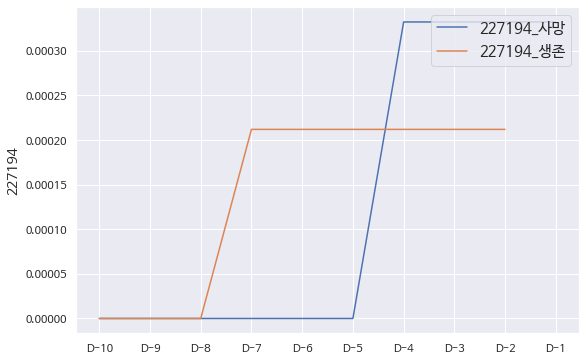

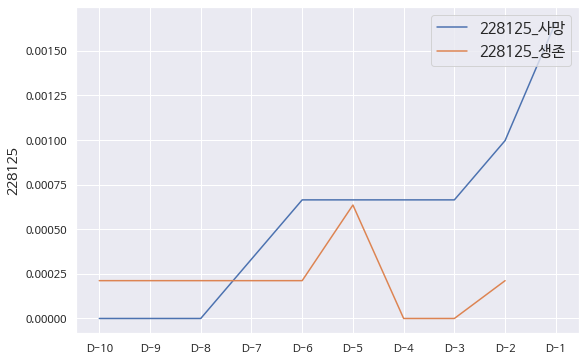

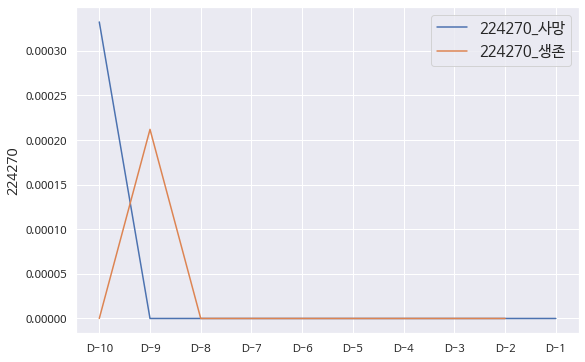

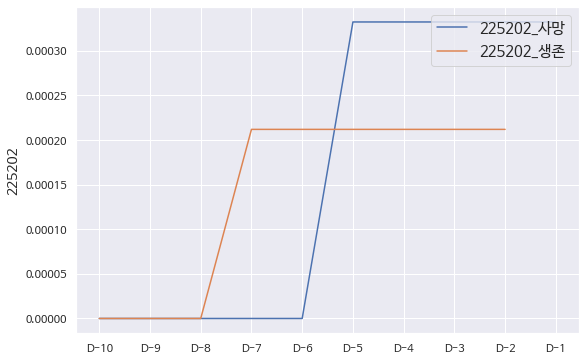

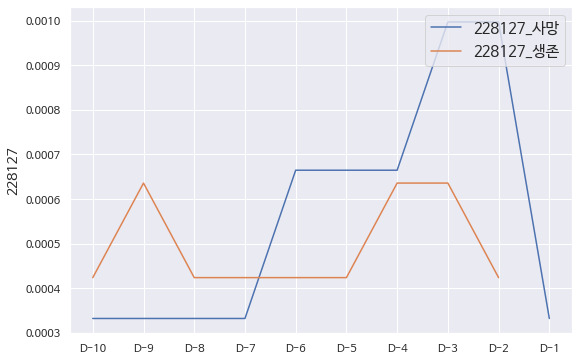

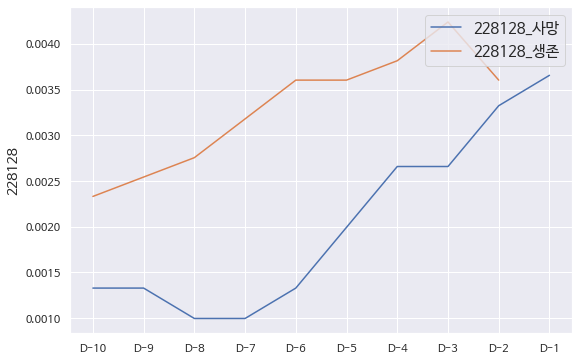

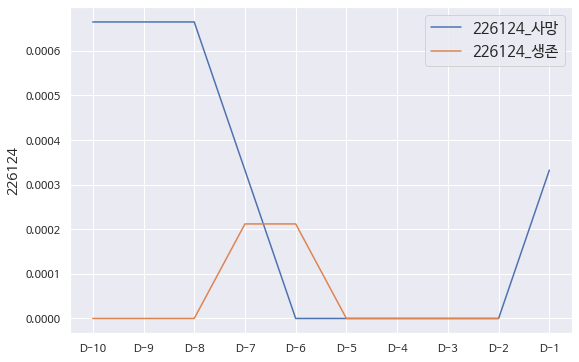

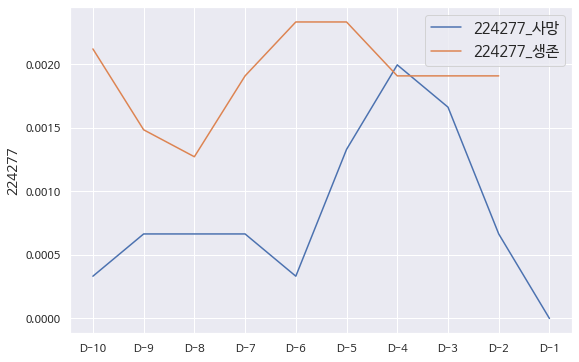

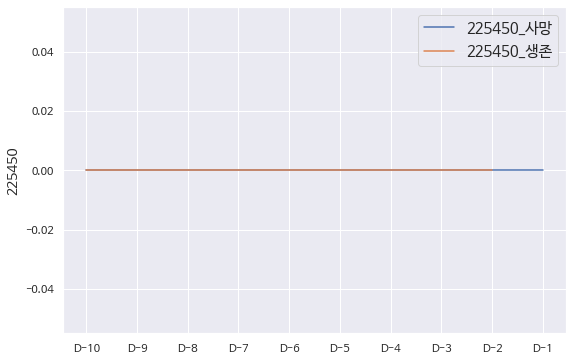

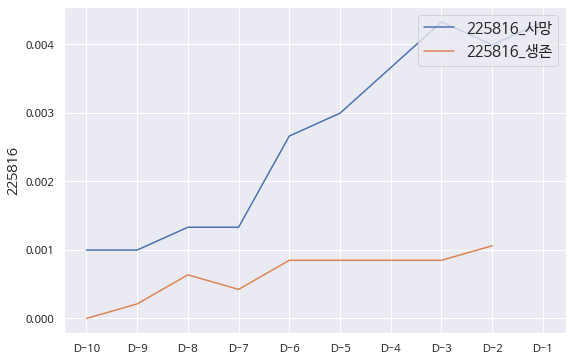

In [30]:
# 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

df_PRO_trans = df_PRO.transpose()
df_PRO_사망자_trans = df_PRO_사망자.transpose()

for i in PRO_top10:
    _ = plt.figure(figsize = (9,6))

    p = sns.lineplot(data = df_PRO_사망자_trans, x = df_PRO_사망자_trans.index, y = f'{i}_사망')
    p = sns.lineplot(data = df_PRO_trans, x = df_PRO_trans.index, y = f'{i}_생존')
    _ = p.legend(labels = [f'{i}_사망', f'{i}_생존'], loc = 'upper right', fontsize=15)
    _ = p.set_ylabel(i, fontsize = 14)

## LAB - top10
- not saved
- 51148, 51003, 50813, 50868, 50889, 50908, 51200, 51482, 51120, 50917
- saved
- 50889, 51200, 51003, 51148, 50868, 50813, 50856, 51362, 51120, 50908

In [46]:
# 1) LAB_top10의 index 구하기
LAB_top10 = LAB_list[:10]
item_list = total_data['ITEMID'].unique()

LAB_index = []
for i in LAB_top10:
    a = list(item_list).index(i)
    LAB_index.append(a)
LAB_index

[284, 257, 70, 476, 72, 10, 1822, 180, 670, 69]

In [33]:
# 2) 생존자 index 구하기
total_data = pd.read_csv('total_data_7727.csv')
sub7727 = total_data['SUBJECT_ID'].unique()

patient = pd.read_csv('폐렴환자.csv')
patient = patient.sort_values(by='SUBJECT_ID')
patient = patient[patient['SUBJECT_ID'].isin(sub7727)]
sub_1_list = patient[patient['EXPIRE_FLAG']==1]['SUBJECT_ID'].values

생존자_index = []
for i in sub_1_list:
    a = list(sub7727).index(i)
    생존자_index.append(a)

In [34]:
# 3) 생존자 4718명의 D-10 ~ D-1 feature별 abnormal sum 

x_생존자 = x[생존자_index,:,:]

result = []
for i in LAB_index:
    for j in range(10):
        result.append(x_생존자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_LAB = pd.DataFrame(result)
df_LAB.columns = [f'D-{i}' for i in range(10,0,-1)]
df_LAB.index = LAB_top10

# 생존한 4718명에 대한 비율 계산
for i in LAB_top10:
    df_LAB.loc[f'{i}_생존'] = df_LAB.loc[i].iloc[:-1]/4718 

# df_LAB

In [35]:
# 4) 사망자 3009명의 D-10 ~ D-1 feature별 abnormal sum 

사망자_index = list(set(range(0,7727))-set(생존자_index))

x_사망자 = x[사망자_index,:,:]

result = []
for i in LAB_index:
    for j in range(10):
        result.append(x_사망자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_LAB_사망자 = pd.DataFrame(result)
df_LAB_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
df_LAB_사망자.index = LAB_top10

# 사망한 3009명에 대한 비율 계산
for i in LAB_top10:
    df_LAB_사망자.loc[f'{i}_사망'] = df_LAB_사망자.loc[i]/3009 

# df_LAB_사망자

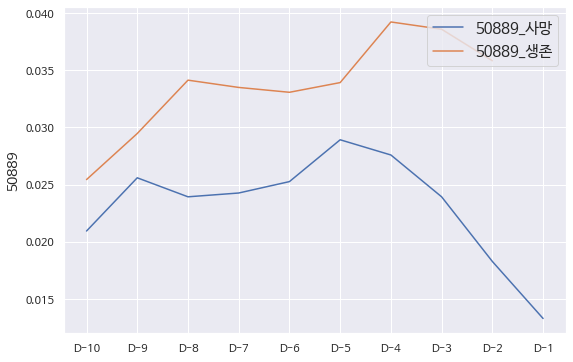

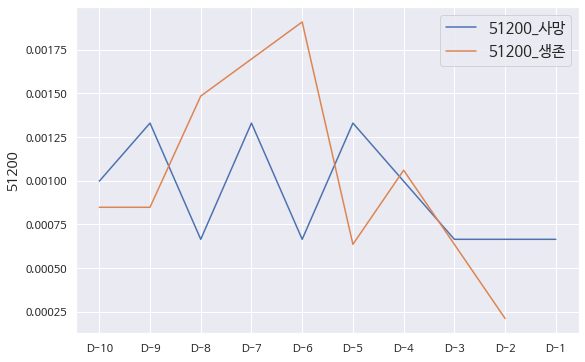

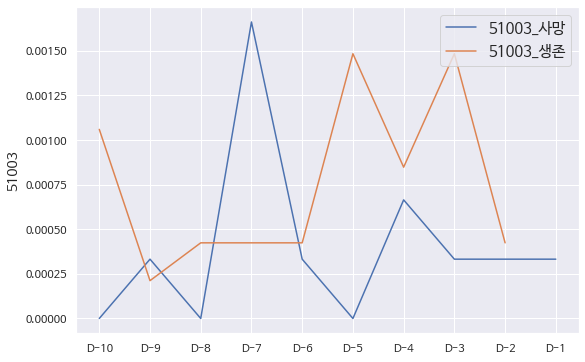

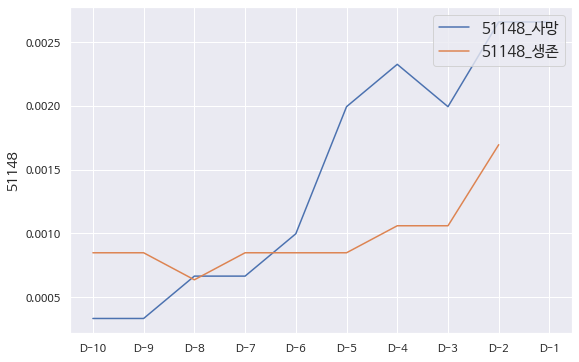

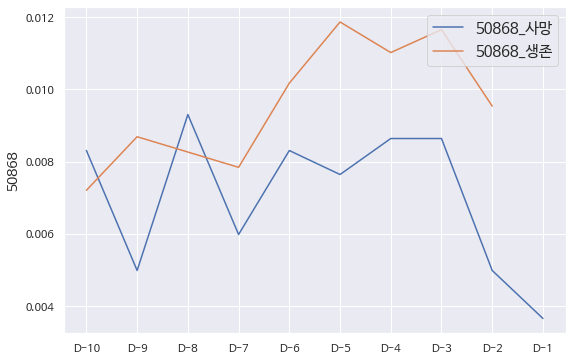

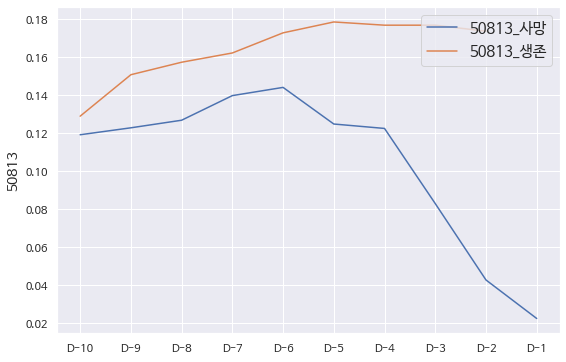

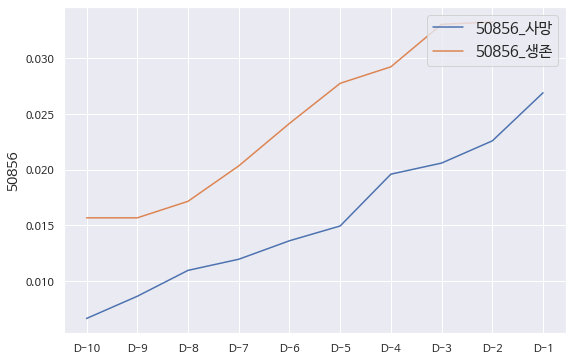

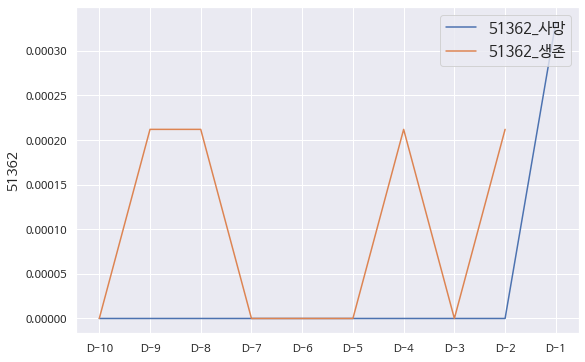

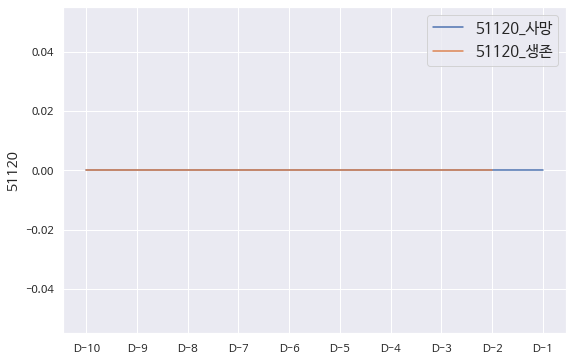

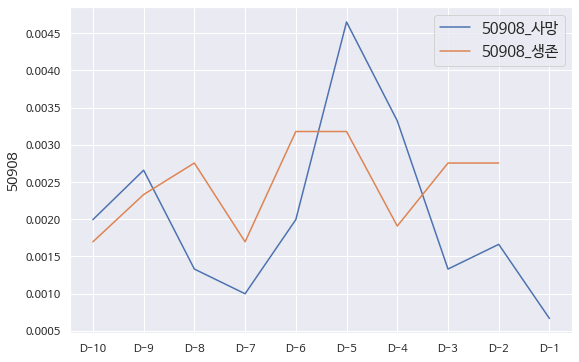

In [36]:
# 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

df_LAB_trans = df_LAB.transpose()
df_LAB_사망자_trans = df_LAB_사망자.transpose()

for i in LAB_top10:
    _ = plt.figure(figsize = (9,6))

    p = sns.lineplot(data = df_LAB_사망자_trans, x = df_LAB_사망자_trans.index, y = f'{i}_사망')
    p = sns.lineplot(data = df_LAB_trans, x = df_LAB_trans.index, y = f'{i}_생존')
    _ = p.legend(labels = [f'{i}_사망', f'{i}_생존'], loc = 'upper right', fontsize=15)
    _ = p.set_ylabel(i, fontsize = 14)

# 1 ~ 5 - Top10 그래프

In [48]:
x = np.load('x_(7727,10,4068).npy')
total_data = pd.read_csv('total_data_7727.csv')

In [49]:
df_d1d5 = df_d1d5.sort_values(by='diff',ascending=False)
d1d5_feature = df_d1d5['feature'].tolist()

# LAB, PRE, PRO의 item_list 생성 
LAB_item = total_data[total_data['TYPE']=='LAB']['ITEMID'].unique()
PRE_item = total_data[total_data['TYPE']=='PRE']['ITEMID'].unique()
PRO_item = total_data[total_data['TYPE']=='PRO']['ITEMID'].unique()

LAB_list = []
PRE_list = []
PRO_list = []
for i in d1d5_feature:
    if i in LAB_item:
        LAB_list.append(i)
    elif i in PRE_item:
        PRE_list.append(i)
    else:
        PRO_list.append(i)

## PRE - top10
- `saved`
- 409606211, 74606211, 67434504, 54817525, 10019055302, 54858516, 74706811, 45006701, 63323016501, 58177025504

In [34]:
# 1) PRE_top10의 index 구하기
PRE_top10 = PRE_list[:10]
item_list = total_data['ITEMID'].unique()

PRE_index = []
for i in PRE_top10:
    a = list(item_list).index(i)
    PRE_index.append(a)

# 2) 생존자 index 구하기 
y = np.load('y_(7727,1).npy')

n = -1

생존자_index1 = []
while True:
    if list(y)[n+1:].count(1) == 0:
        break
    n += list(y)[n+1:].index(1) + 1
    생존자_index1.append(n)
    
# 3) 생존자 4718명의 D-10 ~ D-1 feature별 abnormal sum

x_생존자 = x[생존자_index1,:,:]

result = []
for i in PRE_index:
    for j in range(10):
        result.append(x_생존자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRE = pd.DataFrame(result)
df_PRE.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRE.index = PRE_top10

# 생존한 4718명에 대한 비율 계산 
for i in PRE_top10:
    df_PRE.loc[f'{i}_생존'] = df_PRE.loc[i].iloc[:-1]/4718 

# 4) 사망자 3009명의 D-10 ~ D-1 feature별 abnormal sum 

사망자_index = list(set(range(0,7727))-set(생존자_index1))

x_사망자 = x[사망자_index,:,:]

result = []
for i in PRE_index:
    for j in range(10):
        result.append(x_사망자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRE_사망자 = pd.DataFrame(result)
df_PRE_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRE_사망자.index = PRE_top10

# 사망한 3009명에 대한 비율 계산
for i in PRE_top10:
    df_PRE_사망자.loc[f'{i}_사망'] = df_PRE_사망자.loc[i]/3009 

# df_PRE_사망자

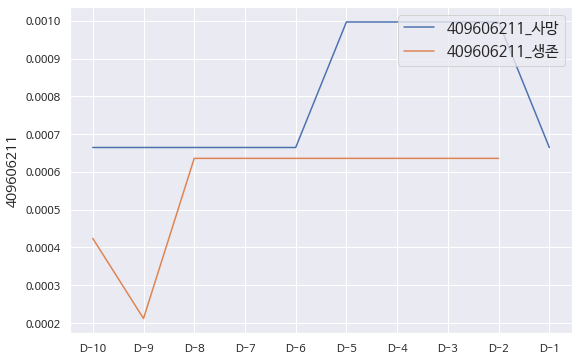

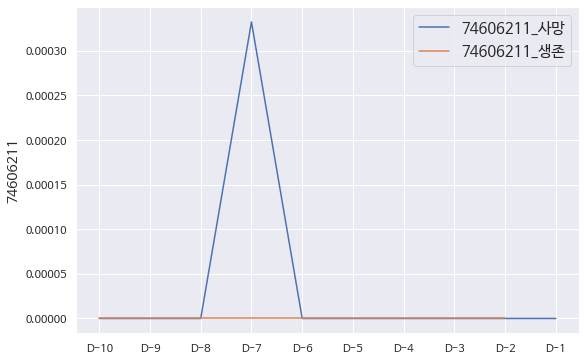

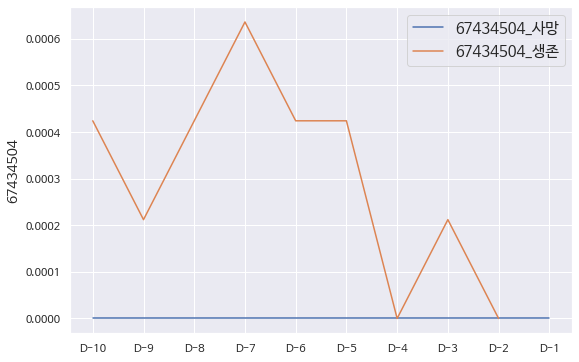

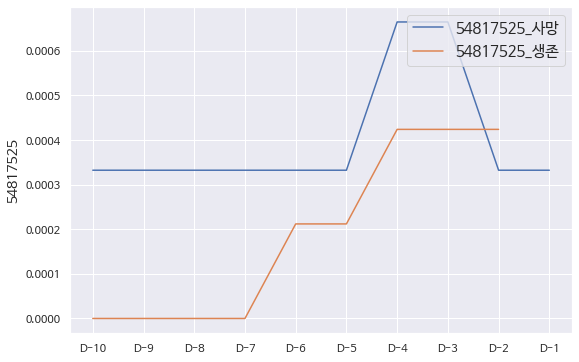

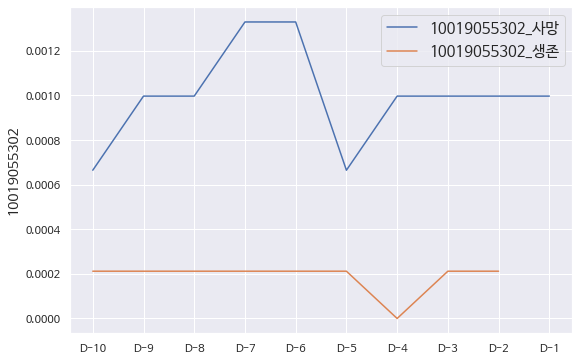

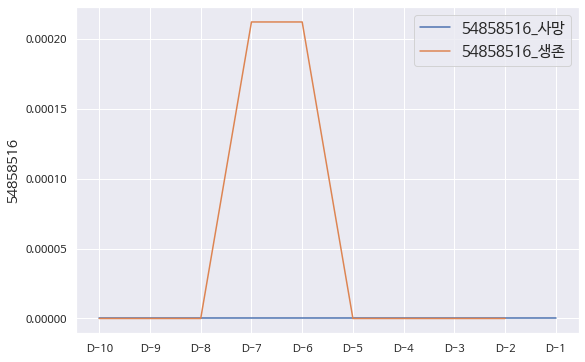

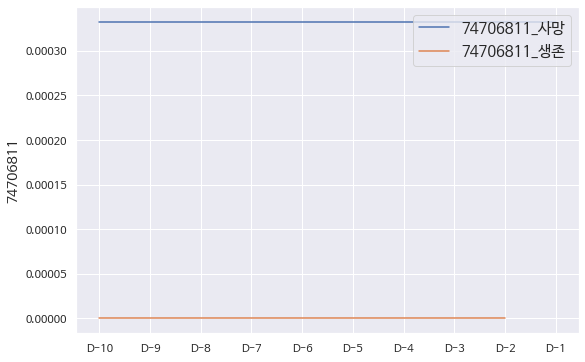

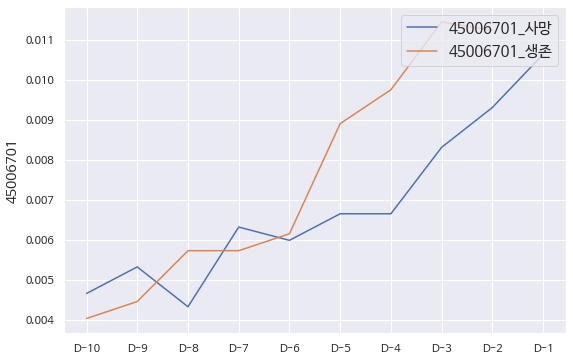

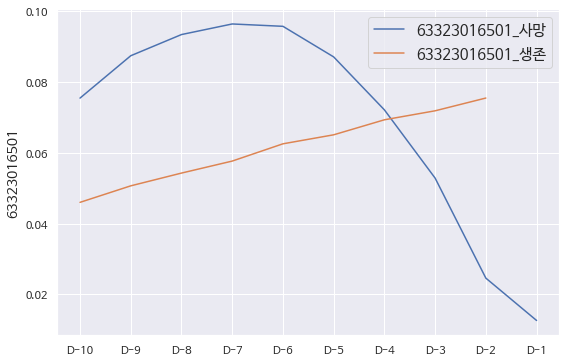

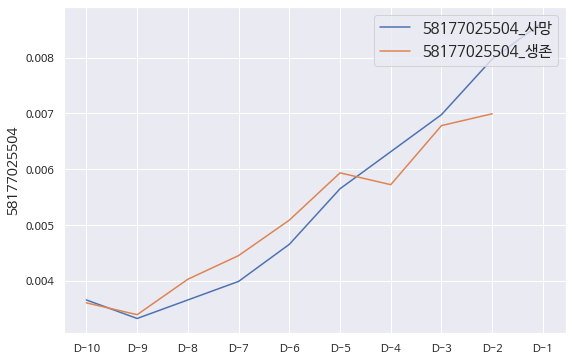

In [35]:
# 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

df_PRE_trans = df_PRE.transpose()
df_PRE_사망자_trans = df_PRE_사망자.transpose()

for i in PRE_top10:
    _ = plt.figure(figsize = (9,6))

    p = sns.lineplot(data = df_PRE_사망자_trans, x = df_PRE_사망자_trans.index, y = f'{i}_사망')
    p = sns.lineplot(data = df_PRE_trans, x = df_PRE_trans.index, y = f'{i}_생존')
    _ = p.legend(labels = [f'{i}_사망', f'{i}_생존'], loc = 'upper right', fontsize=15)
    _ = p.set_ylabel(i, fontsize = 14)

## PRO - top10
- `saved`
- 228125, 224270, 227194, 225202, 228127, 228128, 226124, 225794, 225450, 228130

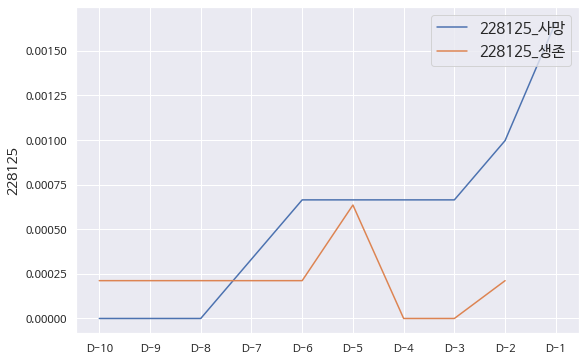

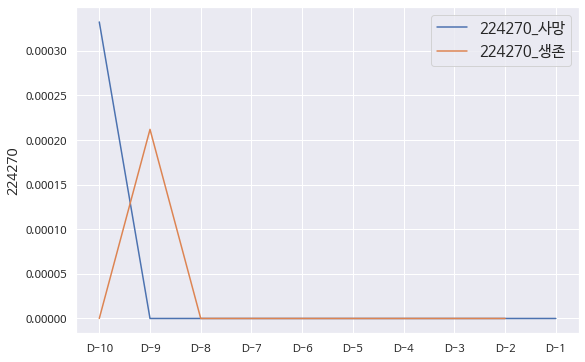

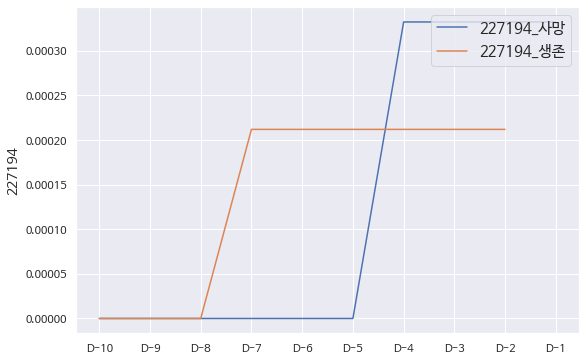

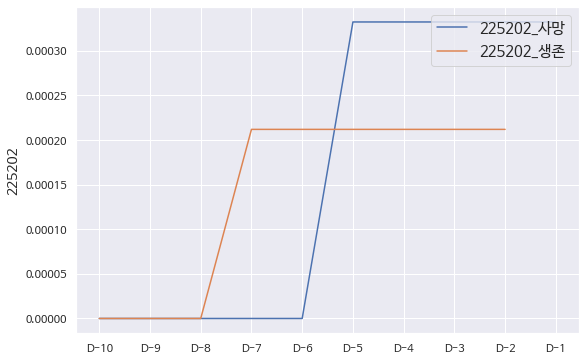

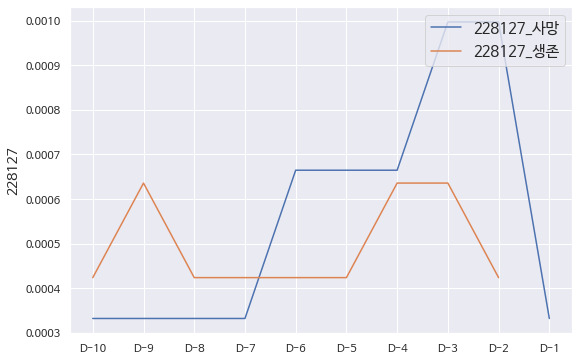

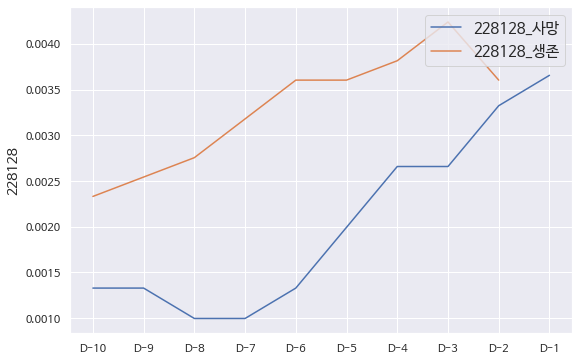

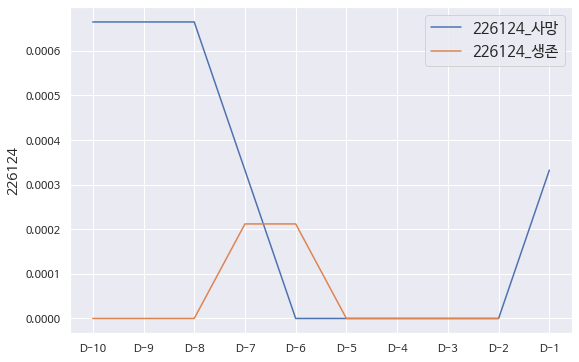

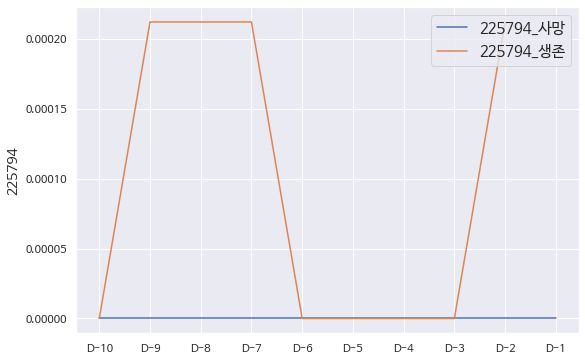

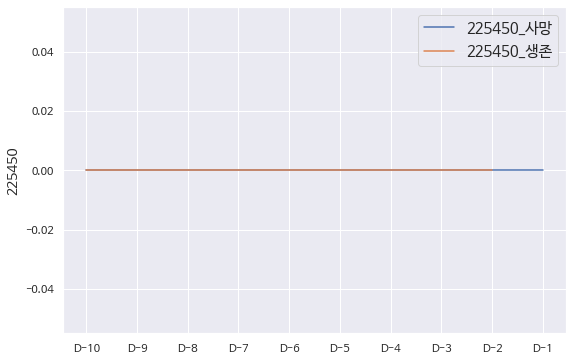

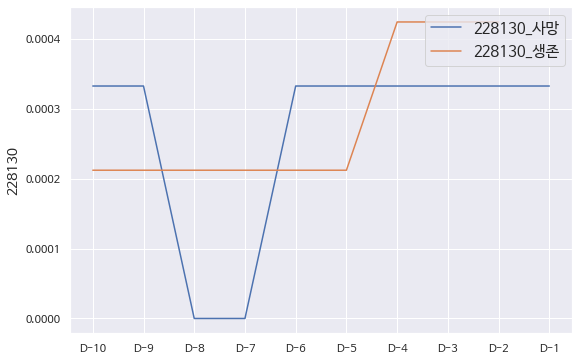

In [37]:
# 1) PRO_top10의 index 구하기
PRO_top10 = PRO_list[:10]
item_list = total_data['ITEMID'].unique()

PRO_index = []
for i in PRO_top10:
    a = list(item_list).index(i)
    PRO_index.append(a)
# PRO_index

# 2) 생존자 index 구하기
total_data = pd.read_csv('total_data_7727.csv')
sub7727 = total_data['SUBJECT_ID'].unique()

patient = pd.read_csv('폐렴환자.csv')
patient = patient.sort_values(by='SUBJECT_ID')
patient = patient[patient['SUBJECT_ID'].isin(sub7727)]
sub_1_list = patient[patient['EXPIRE_FLAG']==1]['SUBJECT_ID'].values

생존자_index = []
for i in sub_1_list:
    a = list(sub7727).index(i)
    생존자_index.append(a)

# 3) 생존자 4718명의 D-10 ~ D-1 feature별 abnormal sum 

x_생존자 = x[생존자_index,:,:]

result = []
for i in PRO_index:
    for j in range(10):
        result.append(x_생존자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRO = pd.DataFrame(result)
df_PRO.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRO.index = PRO_top10

# 생존한 4718명에 대한 비율 계산
for i in PRO_top10:
    df_PRO.loc[f'{i}_생존'] = df_PRO.loc[i].iloc[:-1]/4718 

# df_PRO

# 4) 사망자 3009명의 D-10 ~ D-1 feature별 abnormal sum 

사망자_index = list(set(range(0,7727))-set(생존자_index))

x_사망자 = x[사망자_index,:,:]

result = []
for i in PRO_index:
    for j in range(10):
        result.append(x_사망자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRO_사망자 = pd.DataFrame(result)
df_PRO_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRO_사망자.index = PRO_top10

# 사망한 3009명에 대한 비율 계산
for i in PRO_top10:
    df_PRO_사망자.loc[f'{i}_사망'] = df_PRO_사망자.loc[i]/3009 

# df_PRO_사망자

# 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

df_PRO_trans = df_PRO.transpose()
df_PRO_사망자_trans = df_PRO_사망자.transpose()

for i in PRO_top10:
    _ = plt.figure(figsize = (9,6))

    p = sns.lineplot(data = df_PRO_사망자_trans, x = df_PRO_사망자_trans.index, y = f'{i}_사망')
    p = sns.lineplot(data = df_PRO_trans, x = df_PRO_trans.index, y = f'{i}_생존')
    _ = p.legend(labels = [f'{i}_사망', f'{i}_생존'], loc = 'upper right', fontsize=15)
    _ = p.set_ylabel(i, fontsize = 14)

## LAB - top10
- `saved`
- 51148, 51003, 50813, 50868, 50889, 50908, 51200, 51482, 51120, 50917

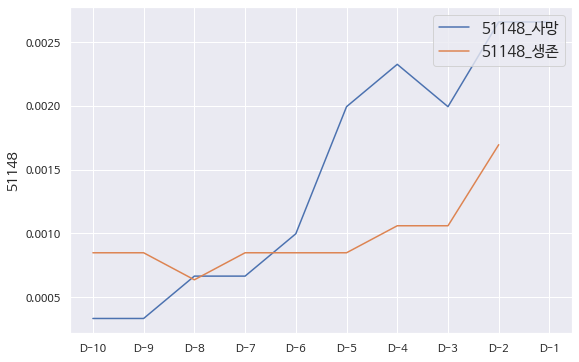

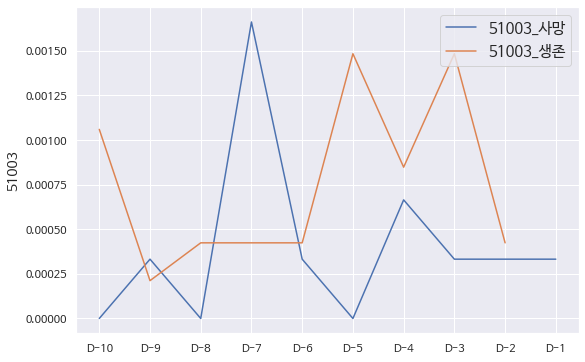

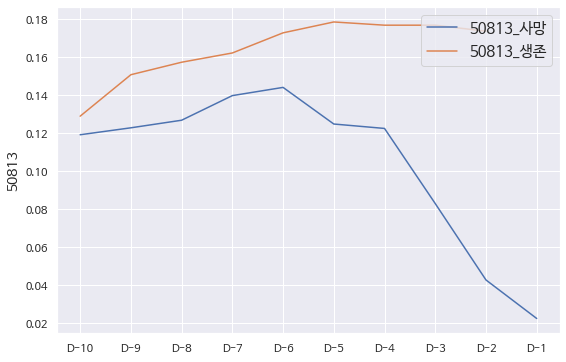

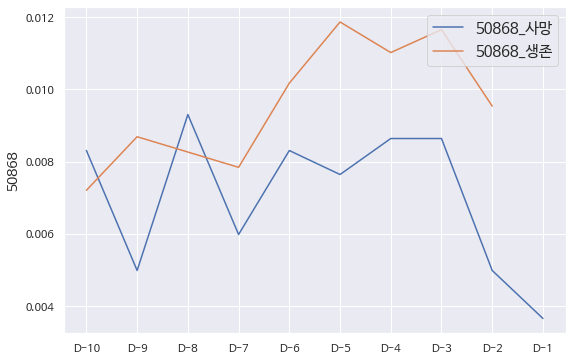

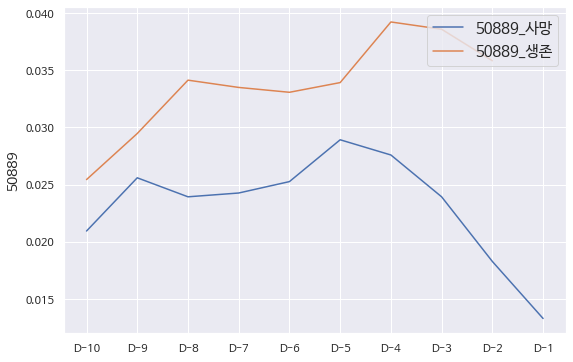

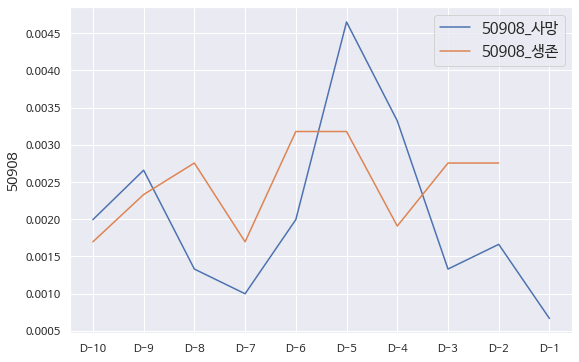

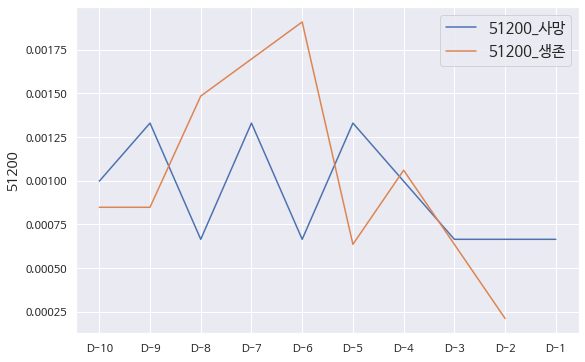

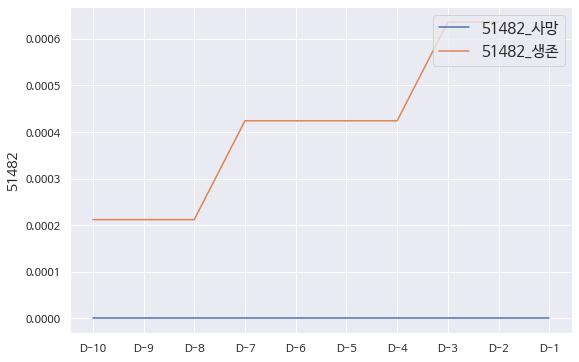

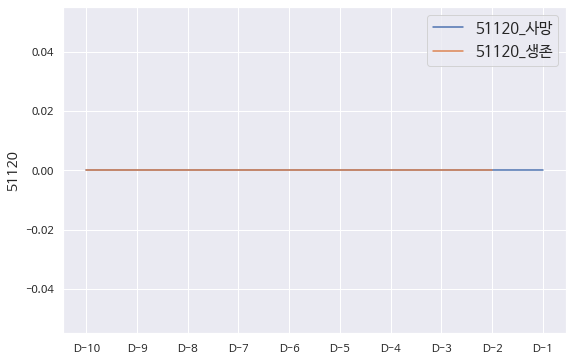

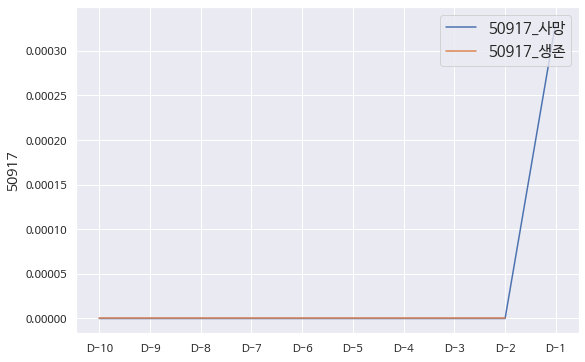

In [50]:
# 1) LAB_top10의 index 구하기
LAB_top10 = LAB_list[:10]
item_list = total_data['ITEMID'].unique()

LAB_index = []
for i in LAB_top10:
    a = list(item_list).index(i)
    LAB_index.append(a)
# LAB_index

# 2) 생존자 index 구하기
total_data = pd.read_csv('total_data_7727.csv')
sub7727 = total_data['SUBJECT_ID'].unique()

patient = pd.read_csv('폐렴환자.csv')
patient = patient.sort_values(by='SUBJECT_ID')
patient = patient[patient['SUBJECT_ID'].isin(sub7727)]
sub_1_list = patient[patient['EXPIRE_FLAG']==1]['SUBJECT_ID'].values

생존자_index = []
for i in sub_1_list:
    a = list(sub7727).index(i)
    생존자_index.append(a)
    
# 3) 생존자 4718명의 D-10 ~ D-1 feature별 abnormal sum 

x_생존자 = x[생존자_index,:,:]

result = []
for i in LAB_index:
    for j in range(10):
        result.append(x_생존자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_LAB = pd.DataFrame(result)
df_LAB.columns = [f'D-{i}' for i in range(10,0,-1)]
df_LAB.index = LAB_top10

# 생존한 4718명에 대한 비율 계산
for i in LAB_top10:
    df_LAB.loc[f'{i}_생존'] = df_LAB.loc[i].iloc[:-1]/4718 

# df_LAB

# 4) 사망자 3009명의 D-10 ~ D-1 feature별 abnormal sum 

사망자_index = list(set(range(0,7727))-set(생존자_index))

x_사망자 = x[사망자_index,:,:]

result = []
for i in LAB_index:
    for j in range(10):
        result.append(x_사망자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_LAB_사망자 = pd.DataFrame(result)
df_LAB_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
df_LAB_사망자.index = LAB_top10

# 사망한 3009명에 대한 비율 계산
for i in LAB_top10:
    df_LAB_사망자.loc[f'{i}_사망'] = df_LAB_사망자.loc[i]/3009 

# df_LAB_사망자

# 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

df_LAB_trans = df_LAB.transpose()
df_LAB_사망자_trans = df_LAB_사망자.transpose()

for i in LAB_top10:
    _ = plt.figure(figsize = (9,6))

    p = sns.lineplot(data = df_LAB_사망자_trans, x = df_LAB_사망자_trans.index, y = f'{i}_사망')
    p = sns.lineplot(data = df_LAB_trans, x = df_LAB_trans.index, y = f'{i}_생존')
    _ = p.legend(labels = [f'{i}_사망', f'{i}_생존'], loc = 'upper right', fontsize=15)
    _ = p.set_ylabel(i, fontsize = 14)

# 6 ~ 10 Top10 그래프

In [4]:
x = np.load('x_(7727,10,4068).npy')
total_data = pd.read_csv('total_data_7727.csv')

In [5]:
df_d6d10 = df_d6d10.sort_values(by='diff',ascending=False)
d6d10_feature = df_d6d10['feature'].tolist()

# LAB, PRE, PRO의 item_list 생성 
LAB_item = total_data[total_data['TYPE']=='LAB']['ITEMID'].unique()
PRE_item = total_data[total_data['TYPE']=='PRE']['ITEMID'].unique()
PRO_item = total_data[total_data['TYPE']=='PRO']['ITEMID'].unique()

LAB_list = []
PRE_list = []
PRO_list = []
for i in d6d10_feature:
    if i in LAB_item:
        LAB_list.append(i)
    elif i in PRE_item:
        PRE_list.append(i)
    else:
        PRO_list.append(i)

## PRE - top10
- `saved`
- 182138167, 517293025, 4003822, 63323038810, 904585461, 25021011210, 49281075221, 63323016101, 781210301, 591040401

In [8]:
# 1) PRE_top10의 index 구하기
PRE_top10 = PRE_list[:10]
item_list = total_data['ITEMID'].unique()

PRE_index = []
for i in PRE_top10:
    a = list(item_list).index(i)
    PRE_index.append(a)
PRE_index

# 2) 생존자 index 구하기 
y = np.load('y_(7727,1).npy')

n = -1

생존자_index1 = []
while True:
    if list(y)[n+1:].count(1) == 0:
        break
    n += list(y)[n+1:].index(1) + 1
    생존자_index1.append(n)
    
# 3) 생존자 4718명의 D-10 ~ D-1 feature별 abnormal sum

x_생존자 = x[생존자_index1,:,:]

result = []
for i in PRE_index:
    for j in range(10):
        result.append(x_생존자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRE = pd.DataFrame(result)
df_PRE.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRE.index = PRE_top10

# 생존한 4718명에 대한 비율 계산 
for i in PRE_top10:
    df_PRE.loc[f'{i}_생존'] = df_PRE.loc[i].iloc[:-1]/4718 

# 4) 사망자 3009명의 D-10 ~ D-1 feature별 abnormal sum 

사망자_index = list(set(range(0,7727))-set(생존자_index1))

x_사망자 = x[사망자_index,:,:]

result = []
for i in PRE_index:
    for j in range(10):
        result.append(x_사망자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRE_사망자 = pd.DataFrame(result)
df_PRE_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRE_사망자.index = PRE_top10

# 사망한 3009명에 대한 비율 계산
for i in PRE_top10:
    df_PRE_사망자.loc[f'{i}_사망'] = df_PRE_사망자.loc[i]/3009 

# df_PRE_사망자

[2173, 94, 971, 1129, 1447, 2220, 703, 239, 2724, 854]

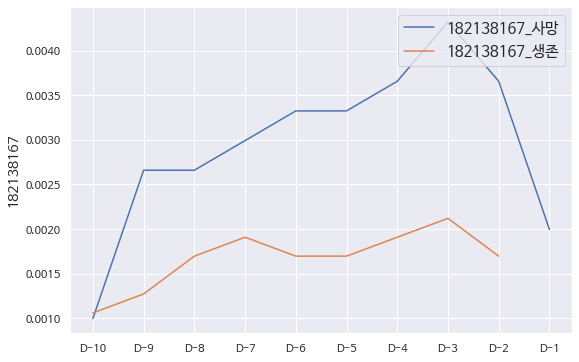

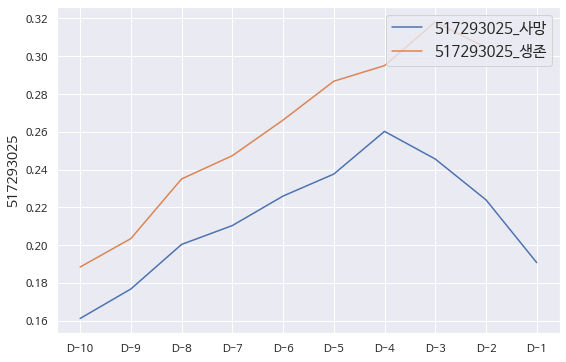

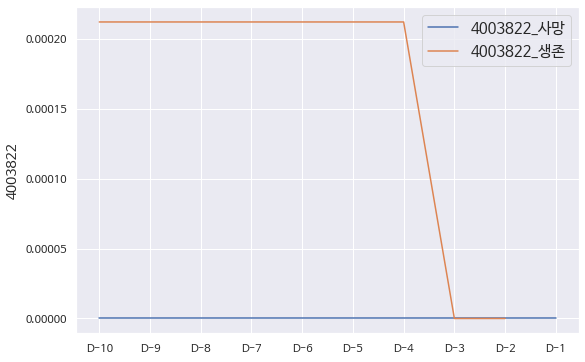

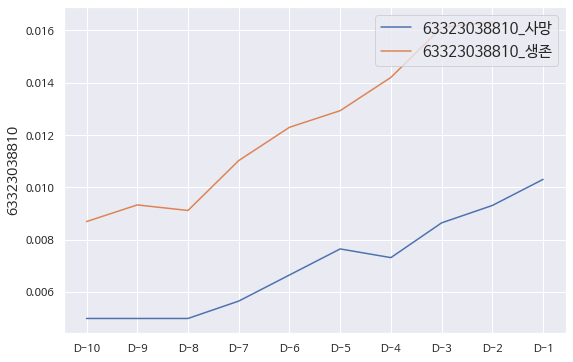

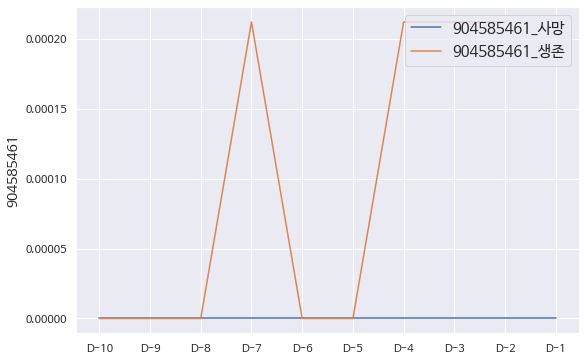

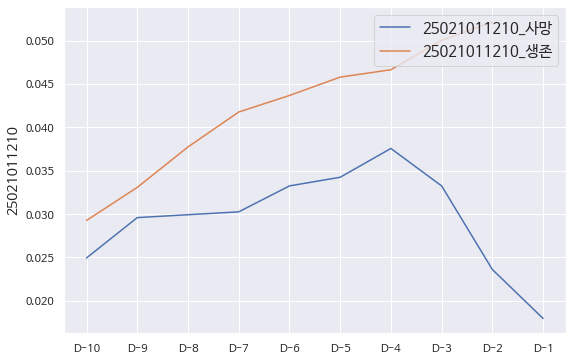

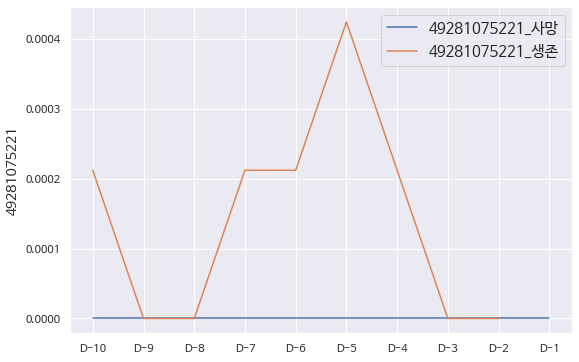

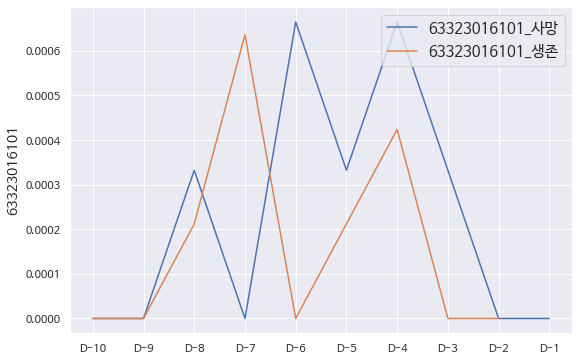

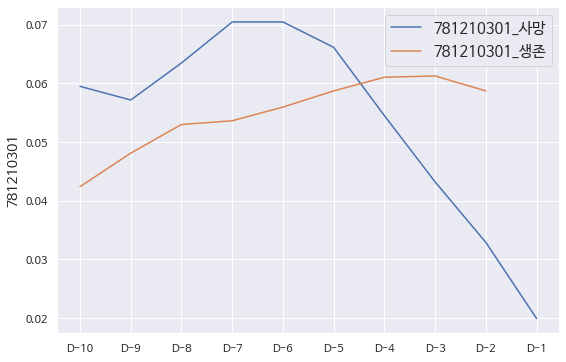

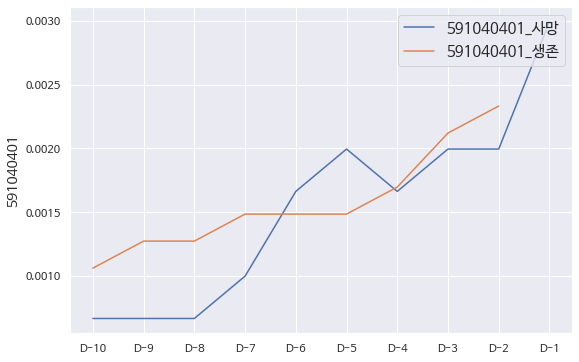

In [9]:
# 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

df_PRE_trans = df_PRE.transpose()
df_PRE_사망자_trans = df_PRE_사망자.transpose()

for i in PRE_top10:
    _ = plt.figure(figsize = (9,6))

    p = sns.lineplot(data = df_PRE_사망자_trans, x = df_PRE_사망자_trans.index, y = f'{i}_사망')
    p = sns.lineplot(data = df_PRE_trans, x = df_PRE_trans.index, y = f'{i}_생존')
    _ = p.legend(labels = [f'{i}_사망', f'{i}_생존'], loc = 'upper right', fontsize=15)
    _ = p.set_ylabel(i, fontsize = 14)

## PRO - top10
- `saved`
- 227194, 225444, 225454, 225432, 224385, 221216, 225469, 225816, 224277, 225459

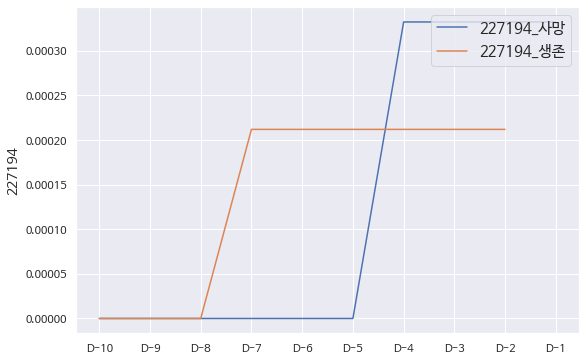

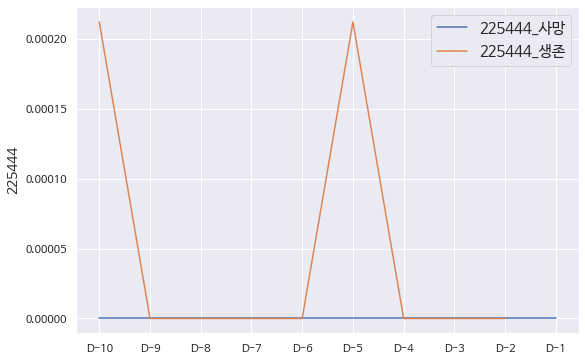

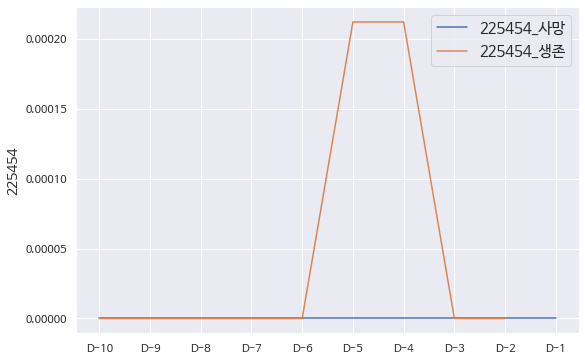

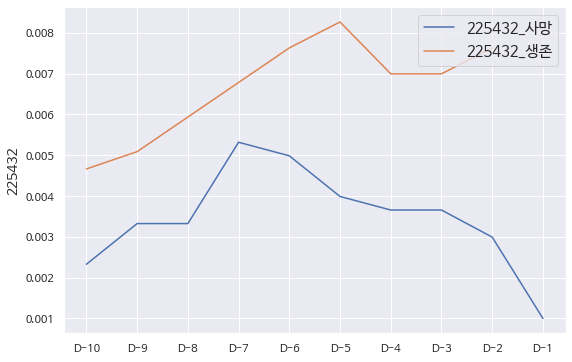

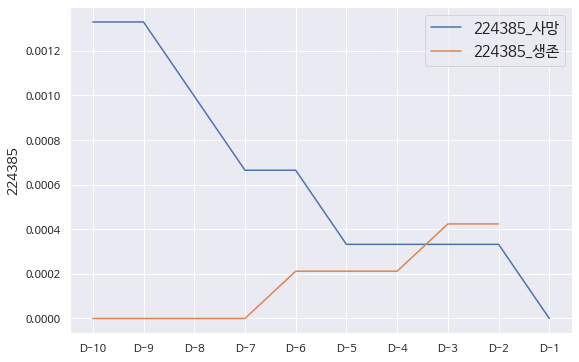

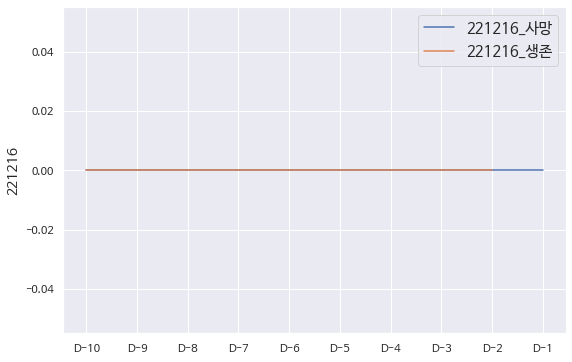

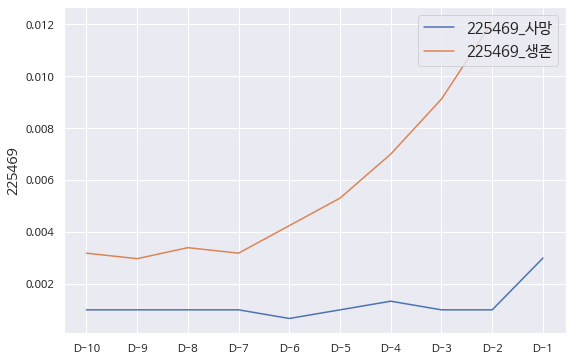

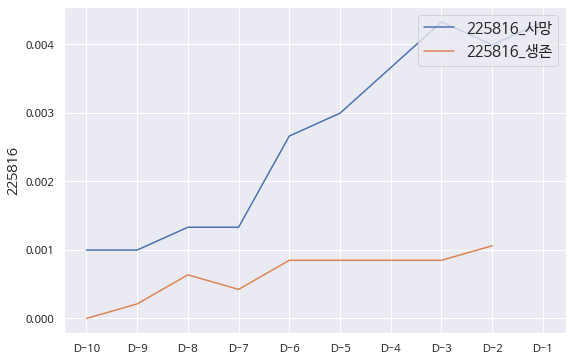

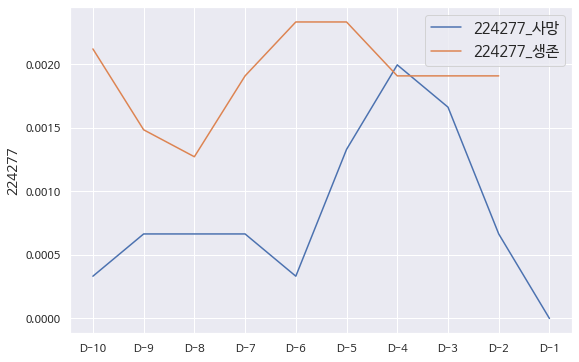

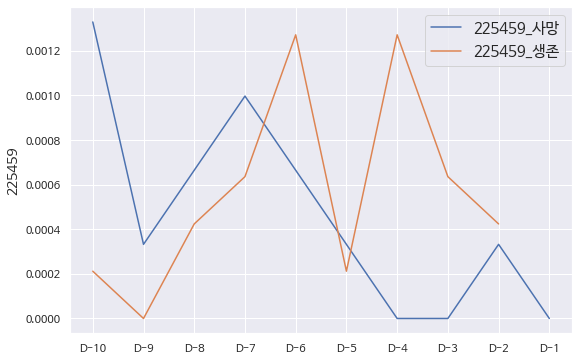

In [11]:
# 1) PRO_top10의 index 구하기
PRO_top10 = PRO_list[:10]
item_list = total_data['ITEMID'].unique()

PRO_index = []
for i in PRO_top10:
    a = list(item_list).index(i)
    PRO_index.append(a)
# PRO_index

# 2) 생존자 index 구하기
total_data = pd.read_csv('total_data_7727.csv')
sub7727 = total_data['SUBJECT_ID'].unique()

patient = pd.read_csv('폐렴환자.csv')
patient = patient.sort_values(by='SUBJECT_ID')
patient = patient[patient['SUBJECT_ID'].isin(sub7727)]
sub_1_list = patient[patient['EXPIRE_FLAG']==1]['SUBJECT_ID'].values

생존자_index = []
for i in sub_1_list:
    a = list(sub7727).index(i)
    생존자_index.append(a)

# 3) 생존자 4718명의 D-10 ~ D-1 feature별 abnormal sum 

x_생존자 = x[생존자_index,:,:]

result = []
for i in PRO_index:
    for j in range(10):
        result.append(x_생존자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRO = pd.DataFrame(result)
df_PRO.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRO.index = PRO_top10

# 생존한 4718명에 대한 비율 계산
for i in PRO_top10:
    df_PRO.loc[f'{i}_생존'] = df_PRO.loc[i].iloc[:-1]/4718 

# df_PRO

# 4) 사망자 3009명의 D-10 ~ D-1 feature별 abnormal sum 

사망자_index = list(set(range(0,7727))-set(생존자_index))

x_사망자 = x[사망자_index,:,:]

result = []
for i in PRO_index:
    for j in range(10):
        result.append(x_사망자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_PRO_사망자 = pd.DataFrame(result)
df_PRO_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
df_PRO_사망자.index = PRO_top10

# 사망한 3009명에 대한 비율 계산
for i in PRO_top10:
    df_PRO_사망자.loc[f'{i}_사망'] = df_PRO_사망자.loc[i]/3009 

# df_PRO_사망자

# 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

df_PRO_trans = df_PRO.transpose()
df_PRO_사망자_trans = df_PRO_사망자.transpose()

for i in PRO_top10:
    _ = plt.figure(figsize = (9,6))

    p = sns.lineplot(data = df_PRO_사망자_trans, x = df_PRO_사망자_trans.index, y = f'{i}_사망')
    p = sns.lineplot(data = df_PRO_trans, x = df_PRO_trans.index, y = f'{i}_생존')
    _ = p.legend(labels = [f'{i}_사망', f'{i}_생존'], loc = 'upper right', fontsize=15)
    _ = p.set_ylabel(i, fontsize = 14)

## LAB - top10

- `saved`
- 50889, 51200, 51362, 51143, 50856, 50929, 50951, 51251, 51283, 50867

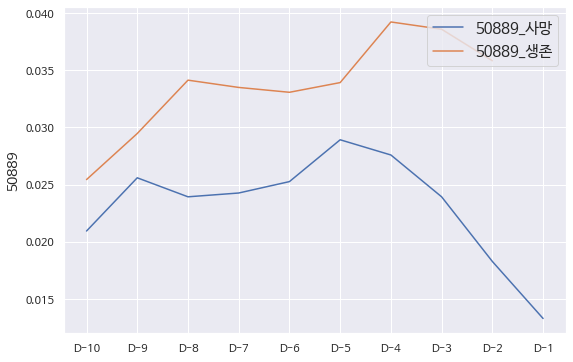

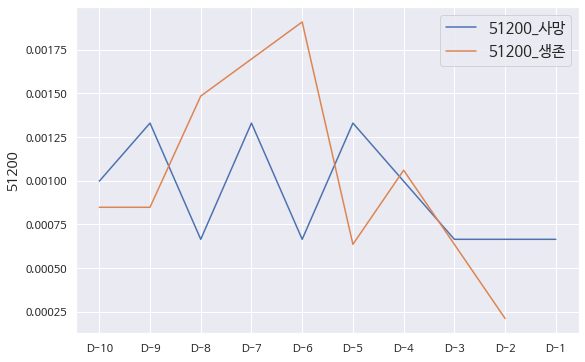

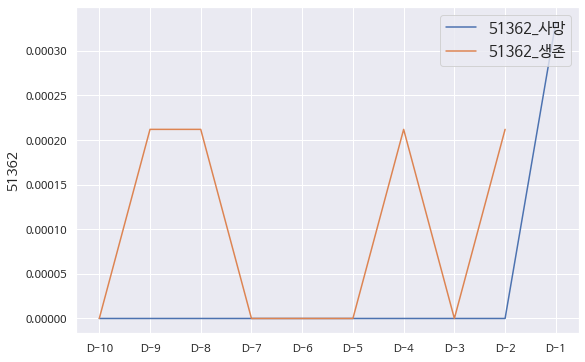

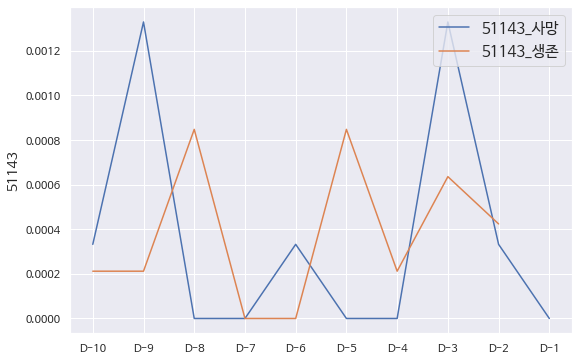

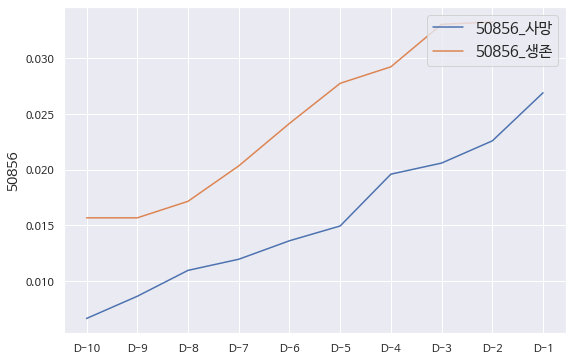

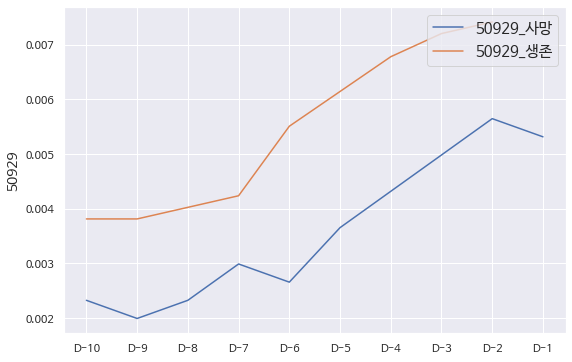

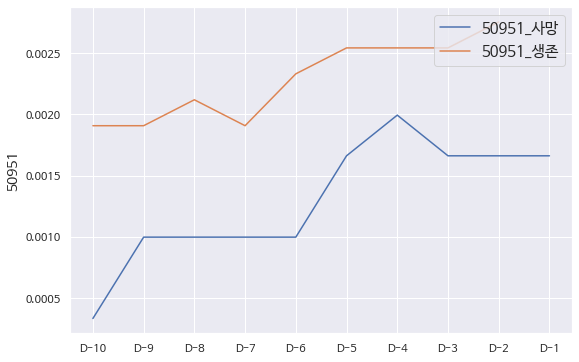

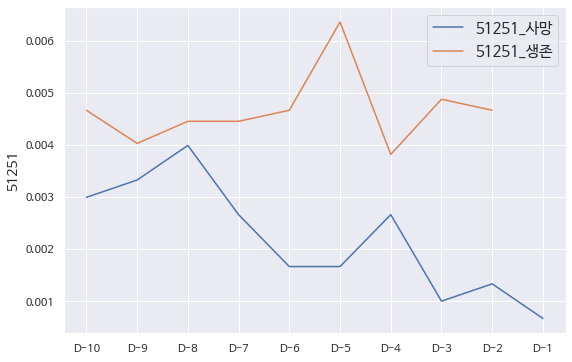

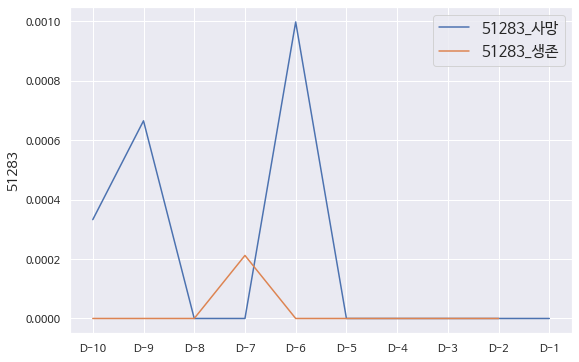

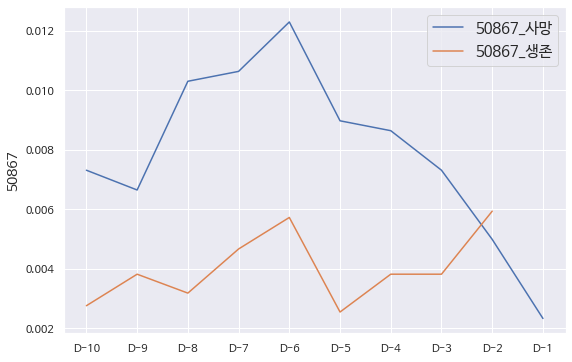

In [13]:
# 1) LAB_top10의 index 구하기
LAB_top10 = LAB_list[:10]
item_list = total_data['ITEMID'].unique()

LAB_index = []
for i in LAB_top10:
    a = list(item_list).index(i)
    LAB_index.append(a)
# LAB_index

# 2) 생존자 index 구하기
total_data = pd.read_csv('total_data_7727.csv')
sub7727 = total_data['SUBJECT_ID'].unique()

patient = pd.read_csv('폐렴환자.csv')
patient = patient.sort_values(by='SUBJECT_ID')
patient = patient[patient['SUBJECT_ID'].isin(sub7727)]
sub_1_list = patient[patient['EXPIRE_FLAG']==1]['SUBJECT_ID'].values

생존자_index = []
for i in sub_1_list:
    a = list(sub7727).index(i)
    생존자_index.append(a)
    
# 3) 생존자 4718명의 D-10 ~ D-1 feature별 abnormal sum 

x_생존자 = x[생존자_index,:,:]

result = []
for i in LAB_index:
    for j in range(10):
        result.append(x_생존자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_LAB = pd.DataFrame(result)
df_LAB.columns = [f'D-{i}' for i in range(10,0,-1)]
df_LAB.index = LAB_top10

# 생존한 4718명에 대한 비율 계산
for i in LAB_top10:
    df_LAB.loc[f'{i}_생존'] = df_LAB.loc[i].iloc[:-1]/4718 

# df_LAB

# 4) 사망자 3009명의 D-10 ~ D-1 feature별 abnormal sum 

사망자_index = list(set(range(0,7727))-set(생존자_index))

x_사망자 = x[사망자_index,:,:]

result = []
for i in LAB_index:
    for j in range(10):
        result.append(x_사망자[:,j,i].sum())

result = np.array(result)
result = result.reshape(10,-1)
df_LAB_사망자 = pd.DataFrame(result)
df_LAB_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
df_LAB_사망자.index = LAB_top10

# 사망한 3009명에 대한 비율 계산
for i in LAB_top10:
    df_LAB_사망자.loc[f'{i}_사망'] = df_LAB_사망자.loc[i]/3009 

# df_LAB_사망자

# 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

df_LAB_trans = df_LAB.transpose()
df_LAB_사망자_trans = df_LAB_사망자.transpose()

for i in LAB_top10:
    _ = plt.figure(figsize = (9,6))

    p = sns.lineplot(data = df_LAB_사망자_trans, x = df_LAB_사망자_trans.index, y = f'{i}_사망')
    p = sns.lineplot(data = df_LAB_trans, x = df_LAB_trans.index, y = f'{i}_생존')
    _ = p.legend(labels = [f'{i}_사망', f'{i}_생존'], loc = 'upper right', fontsize=15)
    _ = p.set_ylabel(i, fontsize = 14)